<a href="https://colab.research.google.com/github/DrGezka/DrGezka/blob/main/Clustering%20of%20Answer%20Key%20Final%20Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anastasya Nurfitriyani Hidayat
120450080
RB
UAS STATISTIKA SAINS DATA 

Di Suatu universitas ternama di Indonesia yaitu ITERA, terdapat sebuah masalah 

---

dimana kunci jawaban
dari Ujian Akhir Semester hilang pada mata kuliah Pemrograman Berorientasi Fungsi. Kunci jawaban
tersebut selama 10 Tahun tidak berubah. Tercatat terdapat 10 ribu data jawaban mahasiswa dan nilai nya.
Namun , tidak pernah ada Mahasiswa yang berhasil mendapatkan nilai maksimal, yaitu 100. Dataset
tersebut dapat di ilustrasikan menjadi tabel berikut:

In [ ]:
import numpy as np
import pandas as pd

df =pd.read_csv('dataset.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,d,b,d,b,c,e,a,a,e,b,...,c,a,a,b,d,a,d,b,c,78
1,d,d,c,b,c,e,a,c,e,b,...,c,b,c,b,d,b,d,a,c,62
2,d,a,c,b,a,e,a,b,e,b,...,c,e,a,d,d,b,d,a,c,89
3,d,a,c,b,c,e,a,e,e,b,...,e,a,d,b,e,b,e,c,c,77
4,a,b,d,a,a,c,a,e,d,b,...,c,a,c,e,b,e,a,a,d,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,d,a,c,b,c,e,e,e,b,e,...,a,c,a,a,d,b,e,b,c,52
9996,c,a,d,e,a,e,a,d,b,a,...,e,c,e,b,c,b,a,e,c,40
9997,b,a,c,b,c,e,a,b,c,b,...,c,a,a,b,a,d,d,b,c,68
9998,d,d,c,b,c,e,a,b,e,b,...,c,a,a,b,d,b,d,a,d,90


Dimana kolom ke-0 sampai kolom ke-99 adalah data jawaban dari 100 soal. Kolom terakhir
menunjukkan nilai ujian mahasiswa. Index menunjukkan ID Mahasiswa.

In [ ]:
dataset = df.rename(columns = {'100': 'Nilai'})
dataset

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Nilai
0,d,b,d,b,c,e,a,a,e,b,...,c,a,a,b,d,a,d,b,c,78
1,d,d,c,b,c,e,a,c,e,b,...,c,b,c,b,d,b,d,a,c,62
2,d,a,c,b,a,e,a,b,e,b,...,c,e,a,d,d,b,d,a,c,89
3,d,a,c,b,c,e,a,e,e,b,...,e,a,d,b,e,b,e,c,c,77
4,a,b,d,a,a,c,a,e,d,b,...,c,a,c,e,b,e,a,a,d,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,d,a,c,b,c,e,e,e,b,e,...,a,c,a,a,d,b,e,b,c,52
9996,c,a,d,e,a,e,a,d,b,a,...,e,c,e,b,c,b,a,e,c,40
9997,b,a,c,b,c,e,a,b,c,b,...,c,a,a,b,a,d,d,b,c,68
9998,d,d,c,b,c,e,a,b,e,b,...,c,a,a,b,d,b,d,a,d,90


1. Bagi dataset menjadi 20% data test dan 80% data train secara acak. Hilangkan kolom nilai
pada data test!

In [ ]:
from sklearn.model_selection import train_test_split
datatrain, datatest= train_test_split(dataset, test_size = 0.2, random_state = 0)

In [ ]:
datatrain

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Nilai
7389,d,a,a,b,a,e,a,b,d,b,...,c,a,a,b,a,b,d,a,c,66
9275,a,c,a,b,d,b,a,b,e,b,...,c,a,a,b,d,d,d,a,c,72
2995,e,d,d,b,b,c,a,e,e,b,...,d,a,a,b,d,b,d,e,c,40
5316,d,a,d,d,c,d,a,c,e,b,...,e,a,e,a,a,c,a,a,e,40
356,d,a,c,a,d,d,e,b,e,b,...,c,b,d,b,d,b,e,c,a,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,d,a,c,b,d,e,a,e,d,b,...,c,a,e,e,d,b,d,a,c,66
4859,e,a,c,b,e,e,a,b,e,d,...,e,c,a,b,d,b,d,a,c,88
3264,d,a,c,b,c,e,a,b,e,b,...,c,a,b,b,d,b,d,c,c,90
9845,e,c,a,b,c,e,a,a,d,a,...,a,a,e,a,d,b,e,a,a,40


In [ ]:
datatest.drop(columns=['Nilai'])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
9394,b,b,a,d,b,c,d,c,e,b,...,b,c,e,a,b,b,c,b,a,c
898,d,a,c,b,c,e,a,d,e,b,...,b,c,a,a,d,d,b,a,a,c
2398,d,a,c,b,d,e,c,e,e,c,...,d,a,d,a,e,d,d,b,d,e
5906,d,e,c,b,b,e,a,b,e,b,...,b,c,a,a,d,a,b,d,a,c
2343,b,c,c,b,a,e,a,b,e,c,...,e,a,b,b,e,b,b,d,e,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,d,d,e,e,a,c,a,c,e,a,...,d,e,b,b,b,c,a,b,c,c
2899,e,e,b,b,e,e,d,d,c,b,...,c,e,b,b,d,e,d,e,a,d
9549,d,a,c,b,c,a,a,b,e,b,...,b,b,a,b,b,e,b,d,e,d
2740,d,a,d,b,c,e,a,b,b,b,...,b,c,a,a,b,d,b,d,a,c


2. Berikan cluster terhadap data train. Berikut ketentuannya:
a. Nilai >= 60 adalah cluster 0
b. Nilai < 60 adalah cluster 1

In [ ]:
#Data Train
cluster=datatrain.copy()
cluster=cluster.assign(kluster=(datatrain['Nilai'].values))

kluster0=cluster.query('Nilai >= 60 and Nilai <= 100')
kluster1=cluster.query('Nilai >=0 and Nilai < 60')

datatrain.loc[kluster0.index,'kluster']=0
datatrain.loc[kluster1.index,'kluster']=1

cluster0 = datatrain.query('Nilai >= 60') #Untuk Cluster 0
cluster1 = datatrain.query('Nilai < 60') #Untuk Cluster1

In [ ]:
#berikut datatest
clstr=datatest.copy()
clstr=clstr.assign(kluster=(datatest['Nilai'].values))

kluster01=clstr.query('Nilai >= 60 ')
kluster02=clstr.query('Nilai < 60 ')

datatest.loc[kluster01.index,'kluster']=0
datatest.loc[kluster02.index,'kluster']=1


cluster1 = datatest.query('Nilai >= 60') #Cluster 1
cluster2 = datatest.query('Nilai < 60 ') #Cluster2


3. Lakukan analisis terhadap jawaban pada soal nomor 29. Lakukan visualisasi data jumlah
jawaban a,b,c,d,e untuk setiap cluster pada soal nomor 29.

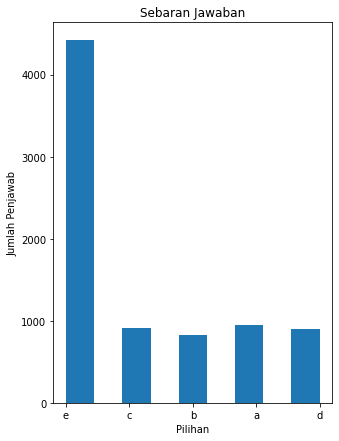

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,Nilai,kluster
7389,d,a,a,b,a,e,a,b,d,b,...,a,a,b,a,b,d,a,c,66,0.0
9275,a,c,a,b,d,b,a,b,e,b,...,a,a,b,d,d,d,a,c,72,0.0
2995,e,d,d,b,b,c,a,e,e,b,...,a,a,b,d,b,d,e,c,40,1.0
5316,d,a,d,d,c,d,a,c,e,b,...,a,e,a,a,c,a,a,e,40,1.0
356,d,a,c,a,d,d,e,b,e,b,...,b,d,b,d,b,e,c,a,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,d,a,c,b,d,e,a,e,d,b,...,a,e,e,d,b,d,a,c,66,0.0
4859,e,a,c,b,e,e,a,b,e,d,...,c,a,b,d,b,d,a,c,88,0.0
3264,d,a,c,b,c,e,a,b,e,b,...,a,b,b,d,b,d,c,c,90,0.0
9845,e,c,a,b,c,e,a,a,d,a,...,a,e,a,d,b,e,a,a,40,1.0


In [ ]:
import matplotlib.pyplot as plt

df = datatrain.rename(columns = {'100' : 'Nilai'})

plt.figure(figsize=(5,7))
plt.hist(df['28'],bins=9)
plt.title("Sebaran Jawaban")
plt.xlabel("Pilihan")
plt.ylabel("Jumlah Penjawab")
plt.show()
df

In [ ]:
cluster0 = df.query('Nilai >= 60') #Cluster 0
cluster1 = df.query('Nilai < 60') #Cluster1


cl0 = cluster0['28'].value_counts()
cl1 = cluster1['28'].value_counts()

print(cl0,cl1)

e    2646
a     234
c     220
d     214
b     179
Name: 28, dtype: int64 e    1770
a     708
c     691
d     691
b     647
Name: 28, dtype: int64


4. Gunakan metode KNN untuk memprediksikan cluster pada data test! Gunakan Leave One
Out cross validation! Gunakan akurasi sebagai metrics nya!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [ ]:
cv = LeaveOneOut()

model = LinearRegression()

scores = cross_val_score(model, datatrain, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#untuk melihat mean absolute error
mean(absolute(scores))

In [ ]:
cv = LeaveOneOut()

model = LinearRegression()
scores = cross_val_score(model,datatrain, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
mean(absolute(scores))